In [15]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [19]:
# 화면에 dataframe 출력할 열의 최대 개수 생략되는 부분 없애주기 위함
pd.set_option("display.max_columns", 50)


# 2015년에서 2019년까지 열 정보가 모두 다르므로, 공통되는 열정보와 통일할 이름 정보를 미리 list 형식으로 선언한다.
valid_col = ["year", "country", "rank", "score", "gdp", "health", "freedom", "generosity", "corruption"]

# data의 경로 설정
dir = 'C:/Users/mk/Desktop/happy'

In [20]:
def column_check(columns, df):
    '''
        사용할 column의 정보를 확인하기 위한 함수
        input params
            columns : 불러온 dataframe의 열정보
            df : 불러온 dataframe input

        설명 : 기존 dataframe의 열정보를 loop로 탐색하며 선언한 열이름 list에 포함되는지 확인하는 과정을 거치고
              포함된다면 dataframe의 기존 열이름을 선언한 열이름으로 바꾸는 과정을 거쳐 마지막에 사용할 열들의 구성으로 출력한다.
    '''

    for col in columns:
        for v_col in valid_col:
            if v_col in col: # 문자열 비교를 통해 선언한 column 이름으로 바꿔주는 과정
                df.rename(columns={col : v_col}, inplace=True)

    return df[valid_col]

In [21]:
data_files = glob.glob(os.path.join(dir, '*.csv')) # 지정한 경로에서 .csv 파일 모두 긁어온다.
print(data_files)

for i, f in enumerate(data_files): # 긁어온 csv 파일 차례로 열어서 concat(모두 쌓기 위한 과정 2015~2019)
    f = f.replace('\\', '/') # 경로에 \\ 있다면 / 로 변경한다 아래 split 함수에서 /를 기준으로 split하기 위함
    year = f.split('/')[-1][:-4] # /를 기준으로 split 하고 마지막 값은 20**.csv 이므로 -4까지 indexing하면 년도 정보만 추출된다.
    df = pd.read_csv(f) # csv 파일 read 한다.
    df.columns = df.columns.str.lower() # 읽힌 dataframe 열 정보 모두 소문자로 치환(열값을 column_check 함수에서 모두 확인하기 위함)
    df.columns = df.columns.str.replace(' ', '-') # dataframe 공백을 - 로 치환(공백은 없애주는게 전처리하기 용이함)
    df['year'] = year #추출한 년도 정보 새로운 column에 추가 한다.

    df = column_check(list(df.columns), df) # column check 함수를 통해 사용할 열정보만 추출하고, 열이름을 치환하는 과정을 거친다.
    if i == 0:
        all_df = df
    else:
        all_df = pd.concat([all_df, df]) # 2015~2019 정보 쌓는다.



['C:/Users/mk/Desktop/happy\\2015.csv', 'C:/Users/mk/Desktop/happy\\2016.csv', 'C:/Users/mk/Desktop/happy\\2017.csv', 'C:/Users/mk/Desktop/happy\\2018.csv', 'C:/Users/mk/Desktop/happy\\2019.csv']


In [22]:
all_df.reset_index(drop=True, inplace = True) # 모두 쌓은 data frame index 초기화 
# ex1_df = all_df.groupby(['country'], as_index=False).mean()

In [26]:
year_v = all_df.year.unique()
test_ = pd.pivot_table(all_df, index=['year', 'country'])

for i, y in enumerate(year_v):
    recon_df = test_.loc[y, :].reset_index(drop=False)
    recon_df.sort_values(by=['score'], ascending=False, inplace=True)
    temp_df = pd.concat([recon_df.iloc[:150,:], recon_df.iloc[:150,:]])
    temp_df['year'] = y
    if i == 0:
        p_m_num = temp_df
    else: p_m_num = pd.concat([p_m_num, temp_df])

p_m_num.reset_index(drop=True, inplace=True)
print(p_m_num)


          country  corruption  freedom      gdp  generosity   health  rank  \
0     Switzerland     0.41978  0.66557  1.39651     0.29678  0.94143     1   
1         Iceland     0.14145  0.62877  1.30232     0.43630  0.94784     2   
2         Denmark     0.48357  0.64938  1.32548     0.34139  0.87464     3   
3          Norway     0.36503  0.66973  1.45900     0.34699  0.88521     4   
4          Canada     0.32957  0.63297  1.32629     0.45811  0.90563     5   
...           ...         ...      ...      ...         ...      ...   ...   
1495     Zimbabwe     0.08900  0.36100  0.36600     0.15100  0.43300   146   
1496        Haiti     0.11000  0.02600  0.32300     0.41900  0.44900   147   
1497     Botswana     0.10000  0.45500  1.04100     0.02500  0.53800   148   
1498        Syria     0.14100  0.01300  0.61900     0.33100  0.44000   149   
1499       Malawi     0.08900  0.44300  0.19100     0.21800  0.49500   150   

      score  year  
0     7.587  2015  
1     7.561  2015  
2  

C:\Users\mk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


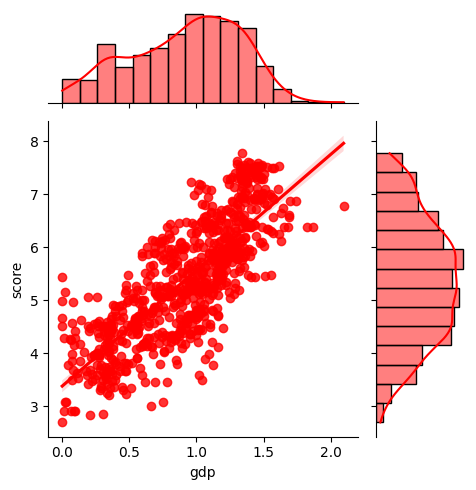

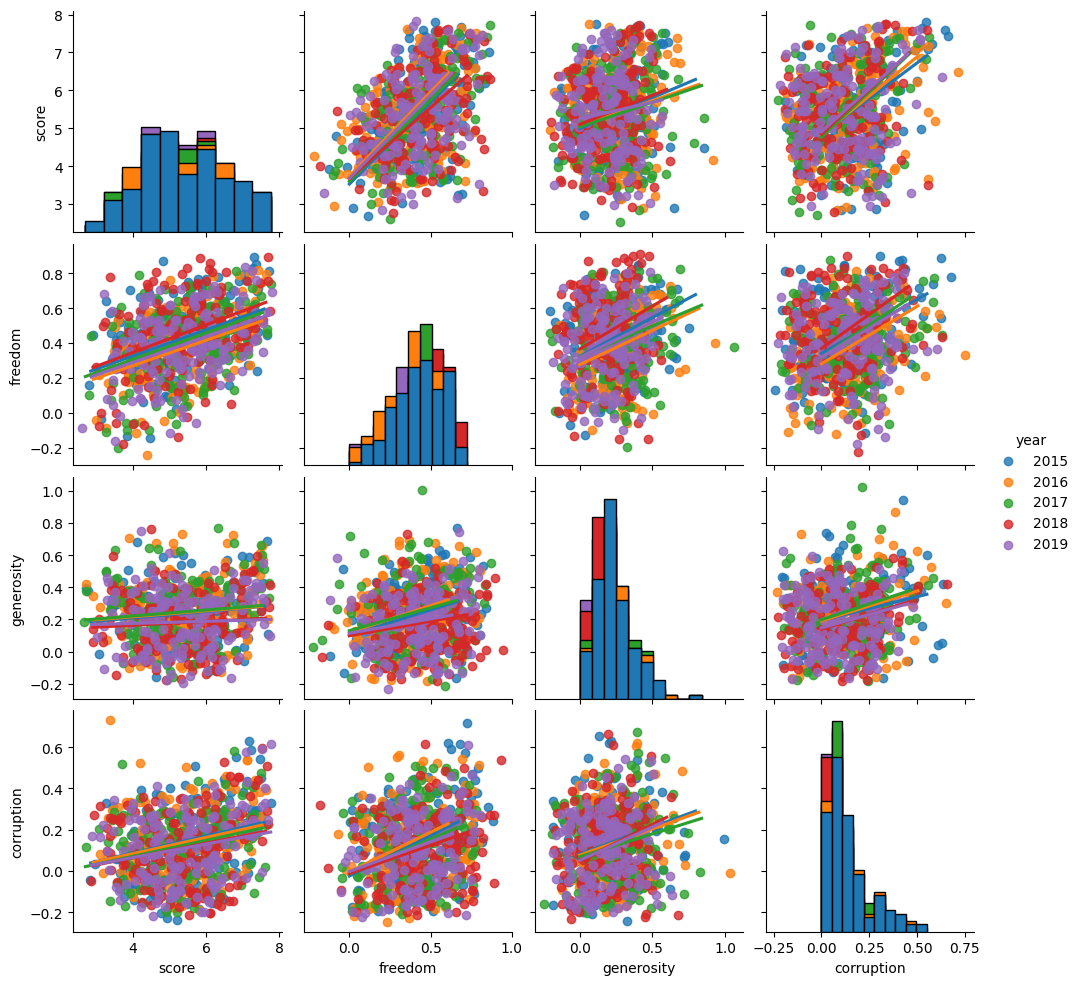

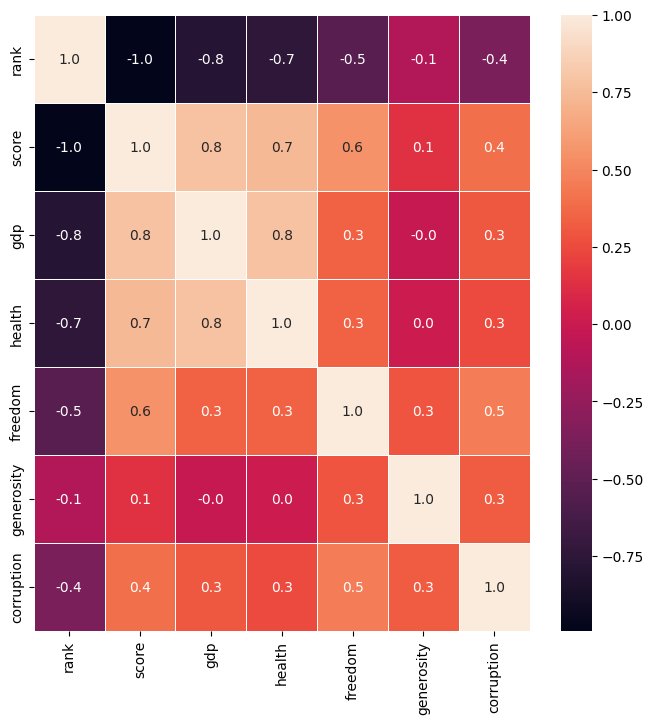

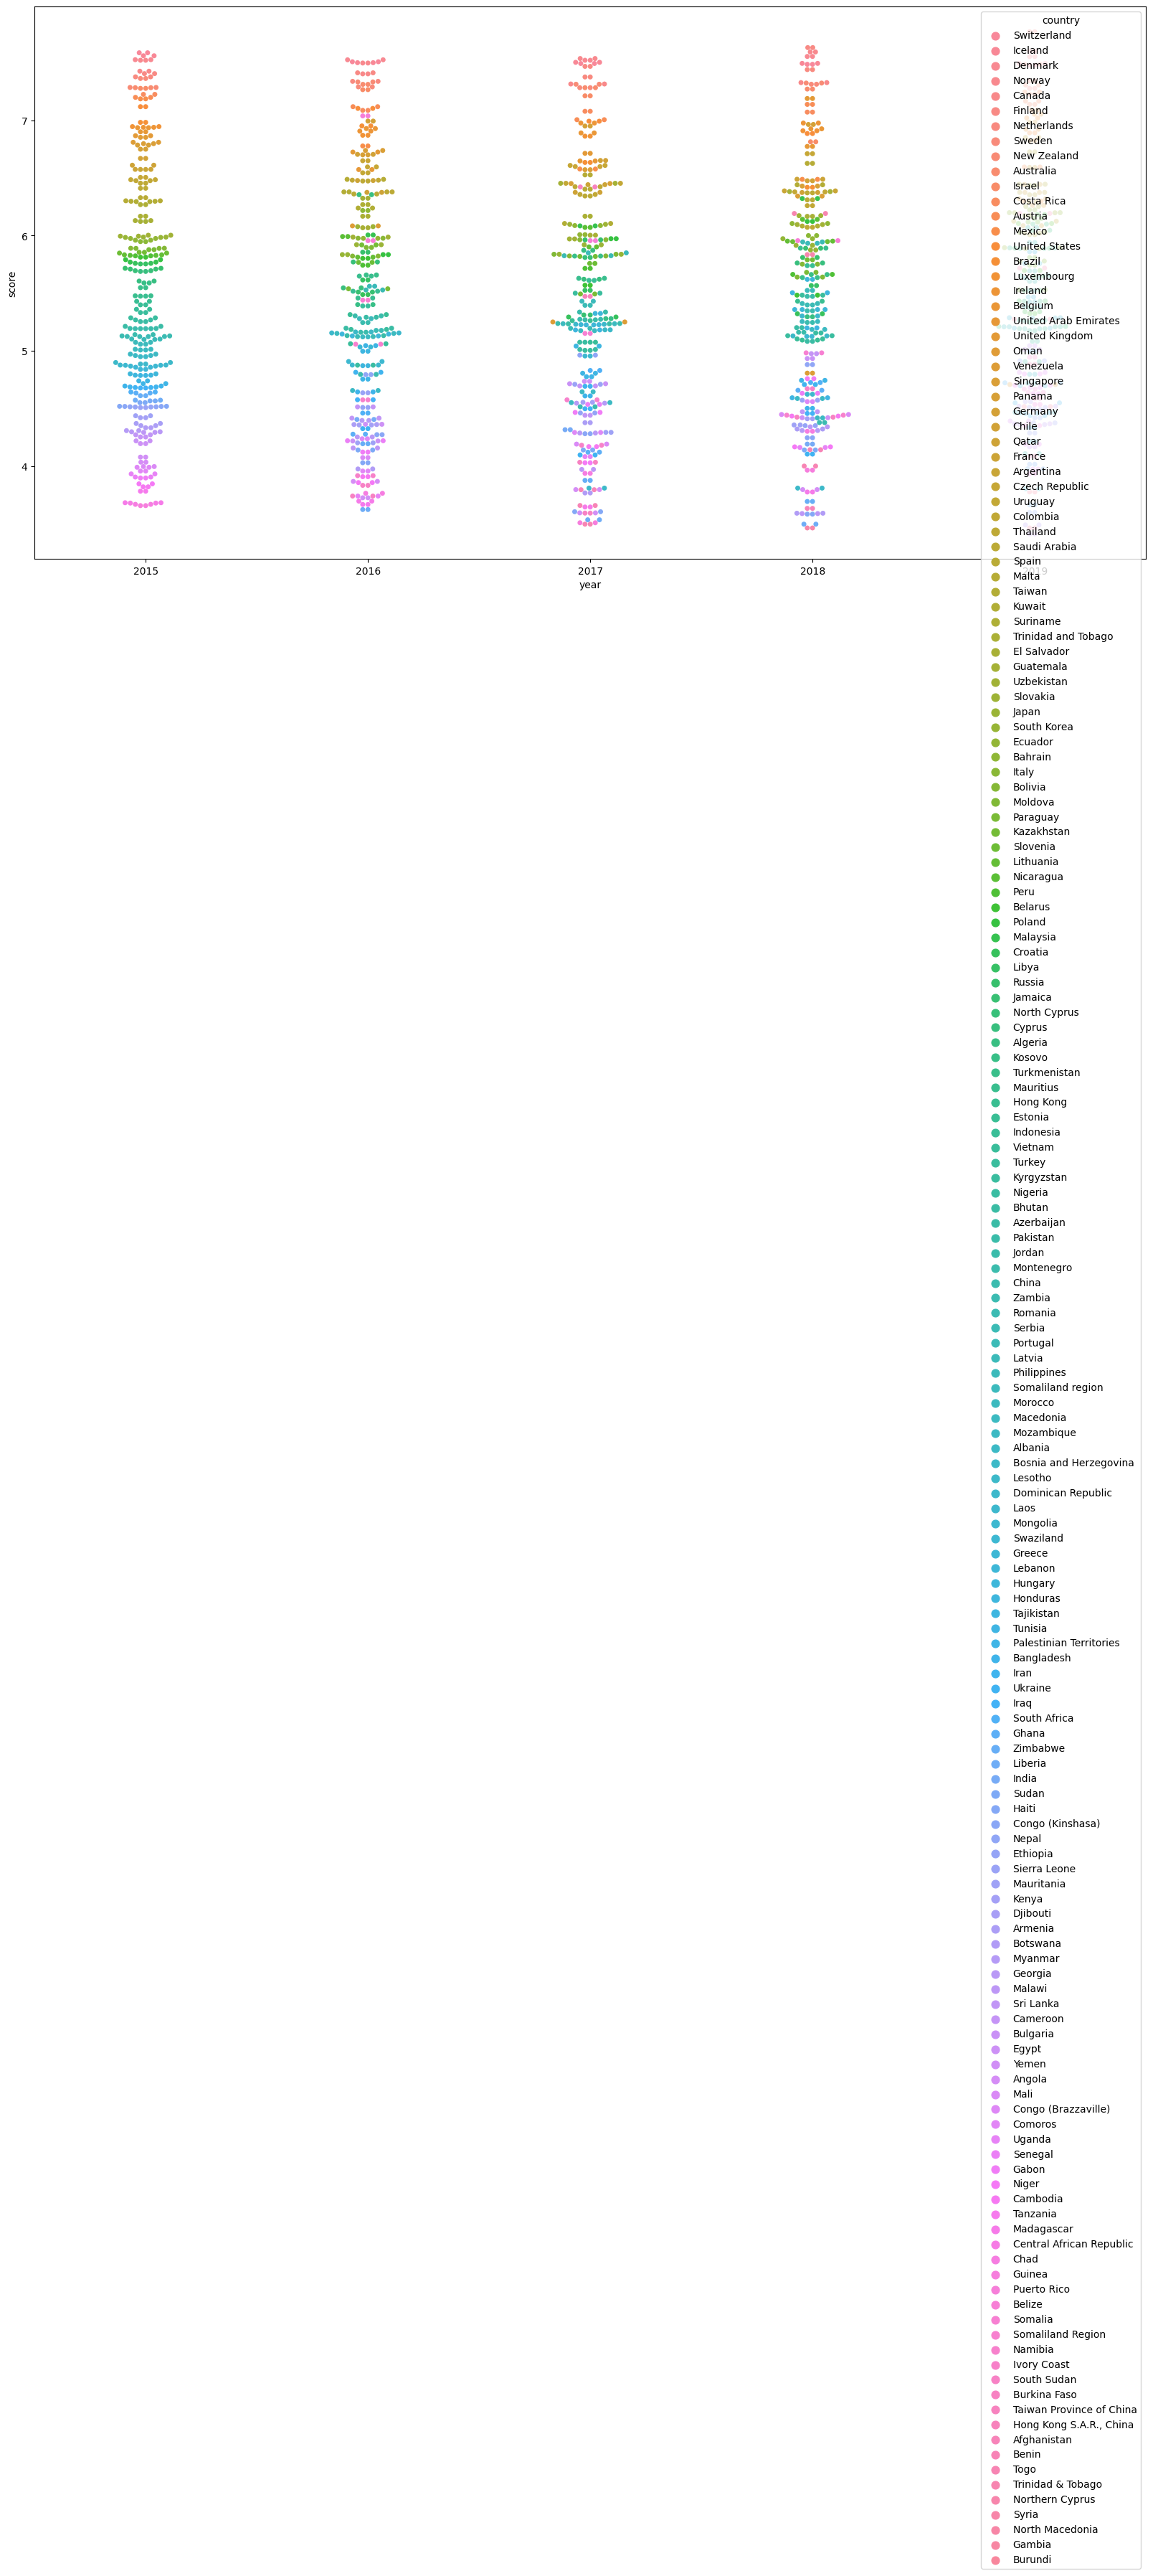

<Figure size 640x480 with 0 Axes>

In [27]:
g = sns.jointplot("gdp", "score", data=all_df, height=5, kind="reg", ratio=3, color="r") # gdp와 score의 상관관계그래프를 볼수 있는 joint plot

g = sns.pairplot(all_df, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, # 전체 data frame 중 score와 freedom, generosity, corruption 값간에 관계를 확인하기 위함
                hue='year',diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0},
                vars=['score', 'freedom', 'generosity', 'corruption'])


f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(all_df.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax) # datafarme의 모든 열간 상관관계를 확인할 수 있는 heatmap
f, ax = plt.subplots(figsize=(20, 10))
sns.swarmplot(x="year", y="score", hue="country", data=p_m_num, ax=ax) # 각 년도별 국가들의 점수 변화를 보기위한 그래프



plt.figure()
# sns.pairplot(all_df)
plt.show()

# plt.figure(figsize=(15, 10))
# temp_df = all_df.loc[:, ["year", "score", "gdp", "health", "freedom"]]
# parallel_coordinates(temp_df, 'year', colormap=plt.get_cmap("Set1"))
# plt.show()